## E-Commerce Sales & Customer Behavior Analysis
This project analyzes e-commerce transactional data to evaluate sales performance, product demand, geographic revenue distribution, return behavior, and customer purchasing patterns to support data-driven business decisions.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter("ignore")

## Objective

The objective of this analysis is to understand overall sales performance,
identify top-performing products and markets, analyze return behavior,
and evaluate customer purchasing frequency and value to inform business
and marketing strategies.

In [7]:
import pandas as pd

df = pd.read_csv("E_Commerce.csv", encoding="latin1")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [9]:
df.shape

(541909, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [13]:
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [15]:
df["InvoiceNo"].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      shape=(25900,), dtype=object)

In [17]:
df["InvoiceNo"].nunique()

25900

In [19]:
df["StockCode"].unique()

array(['85123A', '71053', '84406B', ..., '90214U', '47591b', '23843'],
      shape=(4070,), dtype=object)

In [21]:
df["StockCode"].nunique()

4070

In [23]:
df['Description'].unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], shape=(4224,), dtype=object)

In [25]:
df['Description'].nunique()

4223

In [27]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [29]:
df['Quantity'].nunique()

722

In [31]:
df['InvoiceDate'].unique()

array(['12/1/2010 8:26', '12/1/2010 8:28', '12/1/2010 8:34', ...,
       '12/9/2011 12:31', '12/9/2011 12:49', '12/9/2011 12:50'],
      shape=(23260,), dtype=object)

In [33]:
df['InvoiceDate'].nunique()

23260

In [35]:
df['UnitPrice'].unique()

array([   2.55,    3.39,    2.75, ...,  933.17, 1714.17,  224.69],
      shape=(1630,))

In [37]:
df['UnitPrice'].nunique()

1630

In [39]:
df['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.], shape=(4373,))

In [41]:
df['CustomerID'].nunique()

4372

In [43]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [45]:
df['Country'].nunique()

38

## Dataset Overview

The dataset contains transactional e-commerce data including invoice details,
product descriptions, quantities sold, unit prices, customer identifiers,
and country-level information.


## Data Cleaning & Preparation

The following data preparation steps were performed:
- Removed cancelled and invalid transactions
- Handled missing customer identifiers
- Created revenue-related metrics
- Converted invoice dates into datetime format


**WRONG DATA TYPES**

In [54]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors="coerce")
df["InvoiceDate"]

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [56]:
df["InvoiceNo"] = df["InvoiceNo"].astype("string")
df["InvoiceNo"]

0         536365
1         536365
2         536365
3         536365
4         536365
           ...  
541904    581587
541905    581587
541906    581587
541907    581587
541908    581587
Name: InvoiceNo, Length: 541909, dtype: string

In [58]:
df["CustomerID"] = df["CustomerID"].astype("Int64")
df["CustomerID"]

0         17850
1         17850
2         17850
3         17850
4         17850
          ...  
541904    12680
541905    12680
541906    12680
541907    12680
541908    12680
Name: CustomerID, Length: 541909, dtype: Int64

In [60]:
df.dtypes

InvoiceNo      string[python]
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              Int64
Country                object
dtype: object

In [62]:
df[df["Quantity"] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [64]:
(df["Quantity"] < 0).sum()


np.int64(10624)

In [66]:
neg_with_c = df[
    (df["Quantity"] < 0) &
    (df["InvoiceNo"].str.startswith("C"))
]

neg_with_c.shape

(9288, 8)

In [70]:
neg_without_c = df[
    (df["Quantity"] < 0) &
    (~df["InvoiceNo"].str.startswith("C"))
]

neg_without_c.shape

(1336, 8)

In [72]:
neg_with_c.head()
neg_without_c.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,<NA>,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,<NA>,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,<NA>,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,<NA>,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,<NA>,United Kingdom


In [74]:
neg_without_c.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,<NA>,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,<NA>,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,<NA>,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,<NA>,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,<NA>,United Kingdom
7192,537000,21414,NaN,-22,2010-12-03 15:32:00,0.0,<NA>,United Kingdom
7193,537001,21653,NaN,-6,2010-12-03 15:33:00,0.0,<NA>,United Kingdom
7195,537003,85126,NaN,-2,2010-12-03 15:33:00,0.0,<NA>,United Kingdom
7196,537004,21814,NaN,-30,2010-12-03 15:34:00,0.0,<NA>,United Kingdom
7197,537005,21692,NaN,-70,2010-12-03 15:35:00,0.0,<NA>,United Kingdom


In [76]:
neg_without_c["UnitPrice"].describe()

count    1336.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: UnitPrice, dtype: float64

**Wrong Data**

In [79]:
neg_without_c=df[(df["Quantity"]<0) & (~df["InvoiceNo"].str.startswith("C"))]
neg_without_c.shape,neg_without_c.head()

((1336, 8),
      InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
 2406    536589     21777         NaN       -10 2010-12-01 16:50:00        0.0   
 4347    536764    84952C         NaN       -38 2010-12-02 14:42:00        0.0   
 7188    536996     22712         NaN       -20 2010-12-03 15:30:00        0.0   
 7189    536997     22028         NaN       -20 2010-12-03 15:30:00        0.0   
 7190    536998     85067         NaN        -6 2010-12-03 15:30:00        0.0   
 
       CustomerID         Country  
 2406        <NA>  United Kingdom  
 4347        <NA>  United Kingdom  
 7188        <NA>  United Kingdom  
 7189        <NA>  United Kingdom  
 7190        <NA>  United Kingdom  )

In [81]:
df = df.drop(neg_without_c.index)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [83]:
bad_price = df[df["UnitPrice"] <= 0]
bad_price.shape, bad_price.head()


((1181, 8),
      InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
 622     536414     22139         NaN        56 2010-12-01 11:52:00        0.0   
 1970    536545     21134         NaN         1 2010-12-01 14:32:00        0.0   
 1971    536546     22145         NaN         1 2010-12-01 14:33:00        0.0   
 1972    536547     37509         NaN         1 2010-12-01 14:33:00        0.0   
 1987    536549    85226A         NaN         1 2010-12-01 14:34:00        0.0   
 
       CustomerID         Country  
 622         <NA>  United Kingdom  
 1970        <NA>  United Kingdom  
 1971        <NA>  United Kingdom  
 1972        <NA>  United Kingdom  
 1987        <NA>  United Kingdom  )

In [85]:
df = df[df["UnitPrice"] > 0]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [87]:
qty_zero = df[df["Quantity"] == 0]
qty_zero.shape, qty_zero.head()


((0, 8),
 Empty DataFrame
 Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
 Index: [])

In [89]:
neg_without_c.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,<NA>,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,<NA>,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,<NA>,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,<NA>,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,<NA>,United Kingdom
7192,537000,21414,NaN,-22,2010-12-03 15:32:00,0.0,<NA>,United Kingdom
7193,537001,21653,NaN,-6,2010-12-03 15:33:00,0.0,<NA>,United Kingdom
7195,537003,85126,NaN,-2,2010-12-03 15:33:00,0.0,<NA>,United Kingdom
7196,537004,21814,NaN,-30,2010-12-03 15:34:00,0.0,<NA>,United Kingdom
7197,537005,21692,NaN,-70,2010-12-03 15:35:00,0.0,<NA>,United Kingdom


In [91]:
neg_without_c = df[
    (df["Quantity"] < 0) &
    (~df["InvoiceNo"].astype(str).str.startswith("C"))
]


In [93]:
neg_without_c.shape


(0, 8)

In [95]:
bad_price = df[df["UnitPrice"] <= 0]
bad_price.shape

(0, 8)

In [97]:
bad_price.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [99]:
df[df["UnitPrice"] <= 0].shape


(0, 8)

**Duplicates**

In [106]:
# Check total duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows


np.int64(5263)

In [104]:
df[df.duplicated()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920,United Kingdom


In [108]:
# Check duplicates based on business logic
business_duplicates = df.duplicated(
    subset=['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice']
).sum()

business_duplicates


np.int64(5266)

In [110]:
df = df.drop_duplicates(
    subset=['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice'],
    keep='first'
)


In [112]:
df.duplicated().sum()

np.int64(0)

In [114]:
df.duplicated(
    subset=['InvoiceNo', 'StockCode', 'UnitPrice']
).sum()


np.int64(4833)

**Null Values**

In [119]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132565
Country             0
dtype: int64

In [121]:
df_customers = df[df['CustomerID'].notna()]
df_customers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


## Missing Customer Identifiers

CustomerID contains missing values, which likely represent guest or
unregistered purchases. These records were retained for sales and
product-level analysis, while customer-level analysis was performed
only on transactions with valid CustomerID values.


In [124]:
df["Revenue"] = df["Quantity"] * df["UnitPrice"]
df["Revenue"].describe()

count    534126.000000
mean         18.249580
std         380.945793
min     -168469.600000
25%           3.750000
50%           9.900000
75%          17.570000
max      168469.600000
Name: Revenue, dtype: float64

In [126]:
sales = df[~df["InvoiceNo"].astype(str).str.startswith("C")]
returns = df[df["InvoiceNo"].astype(str).str.startswith("C")]

In [130]:
Q1 = sales["Revenue"].quantile(0.25)
Q3 = sales["Revenue"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

lower_limit,upper_limit

(np.float64(-16.800000000000004), np.float64(38.400000000000006))

## Data Validation Order

Invalid negative quantities not associated with cancellation invoices
were removed first. Transactions with non-positive unit prices were then
excluded. Revenue was calculated only after these cleaning steps to ensure
accurate sales and return metrics.


## Sales trend over time (monthly revenue)

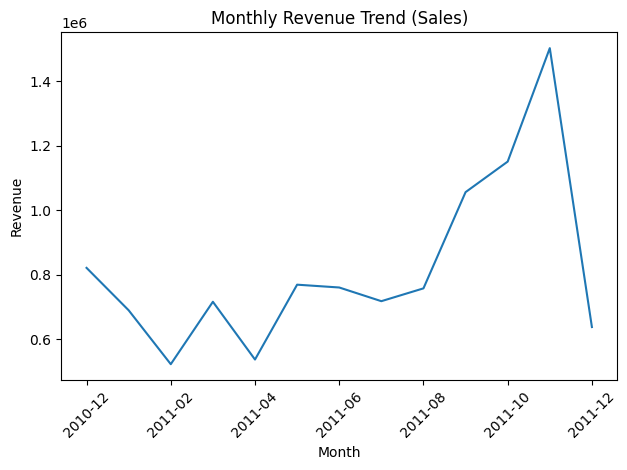

In [133]:
sales["Month"] = sales["InvoiceDate"].dt.to_period("M").astype(str)

monthly = sales.groupby("Month")["Revenue"].sum()

monthly.plot(kind="line")
plt.title("Monthly Revenue Trend (Sales)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Top 10 products by revenue and quantity

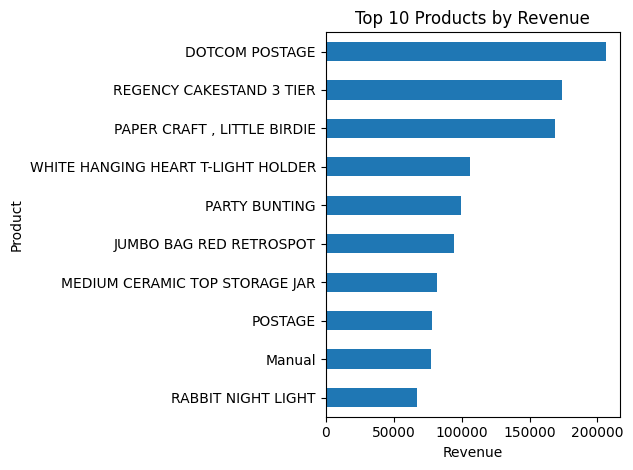

In [137]:
top_rev = sales.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(10)
top_rev.sort_values().plot(kind="barh")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


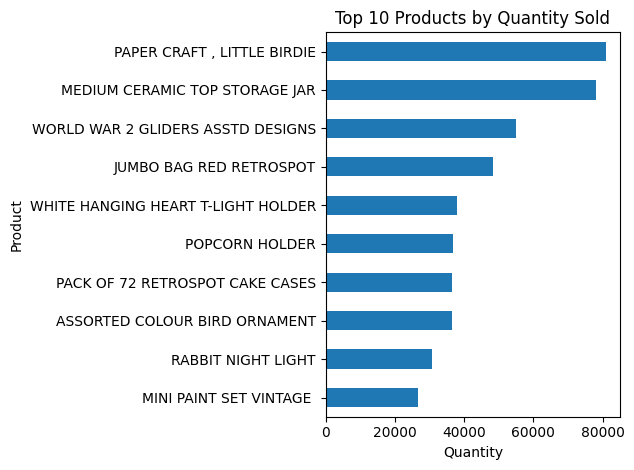

In [139]:
top_qty = sales.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_qty.sort_values().plot(kind="barh")
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Quantity")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


## Top countries by revenue

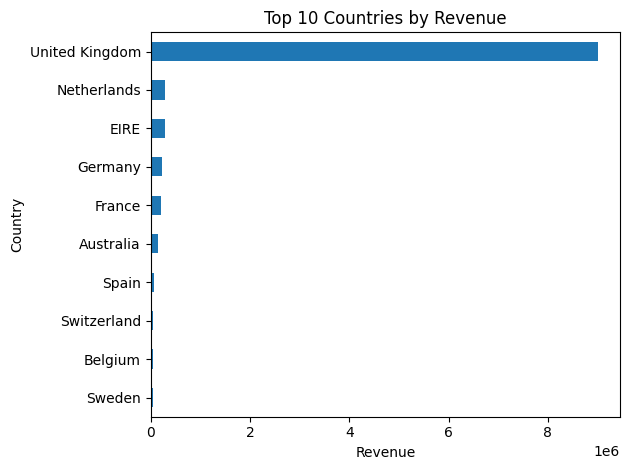

In [142]:
top_countries = sales.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(10)

top_countries.sort_values().plot(kind="barh")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


## Returns behavior and products with high return value

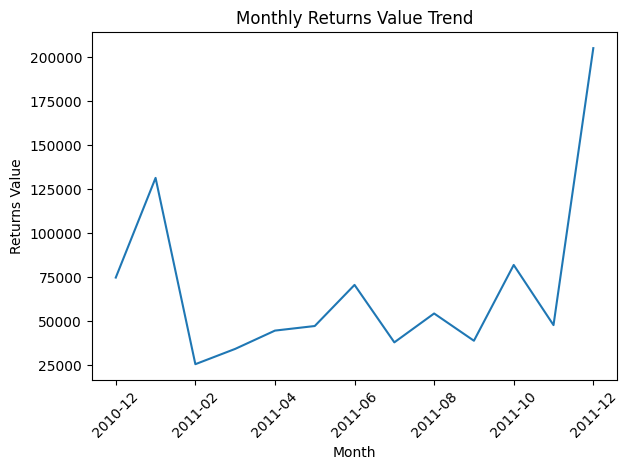

In [145]:
returns["Month"] = returns["InvoiceDate"].dt.to_period("M").astype(str)
monthly_returns = returns.groupby("Month")["Revenue"].sum().abs()

monthly_returns.plot(kind="line")
plt.title("Monthly Returns Value Trend")
plt.xlabel("Month")
plt.ylabel("Returns Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


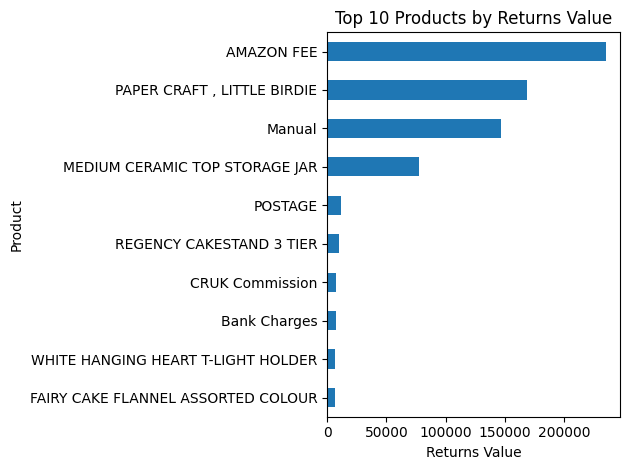

In [147]:
top_returns = returns.groupby("Description")["Revenue"].sum().abs().sort_values(ascending=False).head(10)

top_returns.sort_values().plot(kind="barh")
plt.title("Top 10 Products by Returns Value")
plt.xlabel("Returns Value")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


## Customer purchase frequency and value

In [150]:
df_customers = sales[sales["CustomerID"].notna()].copy()


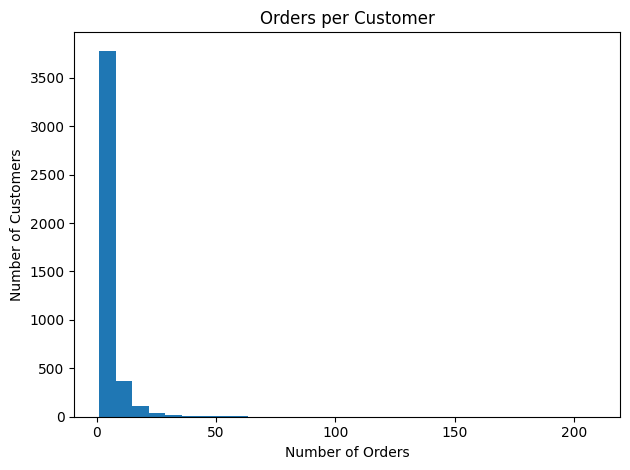

In [152]:
orders_per_customer = df_customers.groupby("CustomerID")["InvoiceNo"].nunique()

orders_per_customer.plot(kind="hist", bins=30)
plt.title("Orders per Customer")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


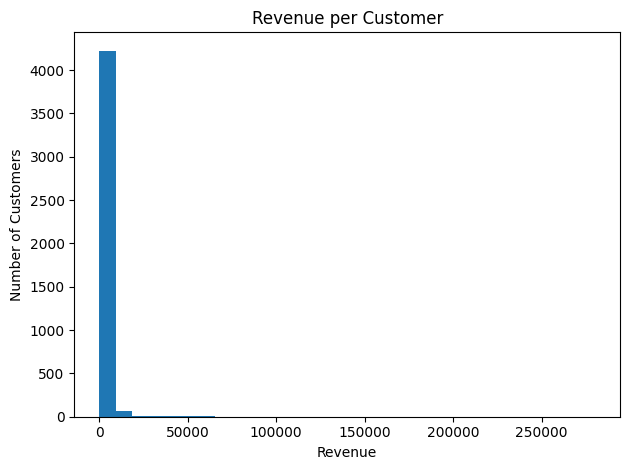

In [154]:
revenue_per_customer = df_customers.groupby("CustomerID")["Revenue"].sum()

revenue_per_customer.plot(kind="hist", bins=30)
plt.title("Revenue per Customer")
plt.xlabel("Revenue")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


## Average Order Value (AOV) over time

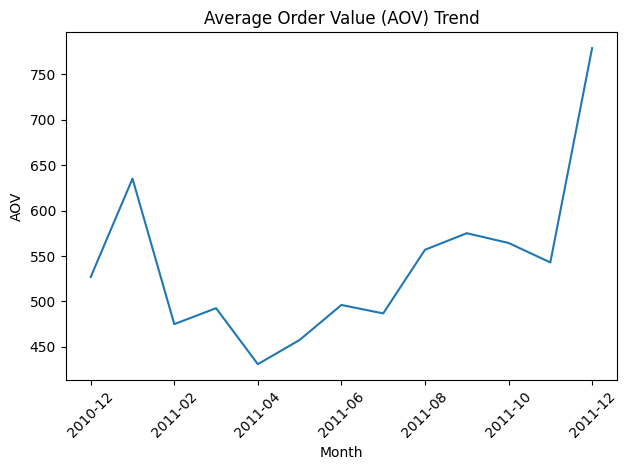

In [157]:
sales["Month"] = sales["InvoiceDate"].dt.to_period("M").astype(str)

monthly_rev = sales.groupby("Month")["Revenue"].sum()
monthly_orders = sales.groupby("Month")["InvoiceNo"].nunique()

monthly_aov = (monthly_rev / monthly_orders)

monthly_aov.plot(kind="line")
plt.title("Average Order Value (AOV) Trend")
plt.xlabel("Month")
plt.ylabel("AOV")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Key Insights

- Overall sales show a clear upward trend over time, indicating healthy business growth with visible seasonal fluctuations.
- A small number of products contribute a disproportionately large share of total revenue and quantity sold, highlighting key inventory drivers.
- Revenue is concentrated in a limited number of countries, suggesting strong core markets and opportunities for targeted regional expansion.
- Product returns are not evenly distributed; a small subset of products accounts for the majority of return value.
- Customer purchasing behavior is highly skewed, with most customers placing few orders while a smaller group demonstrates repeat purchasing and higher spend.
- Average Order Value (AOV) varies over time, likely influenced by promotions, seasonal demand, and purchasing patterns.


## Business Recommendations

- Prioritize inventory planning and promotional efforts around top-performing products that drive the majority of revenue.
- Review product descriptions, pricing, and quality controls for high-return products to reduce return-related costs.
- Focus marketing and operational resources on high-revenue countries while exploring controlled expansion in emerging markets.
- Implement customer retention strategies such as loyalty programs or targeted offers to encourage repeat purchases.
- Use AOV trends to time promotions effectively and design pricing strategies that increase basket size without negatively impacting margins.
